In [1]:
from google.colab import files
up=files.upload()

Saving Global_Climate_Change_Data_2020_2025.csv to Global_Climate_Change_Data_2020_2025.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [3]:
df = pd.read_csv("Global_Climate_Change_Data_2020_2025.csv")


In [4]:
label_encoders = {}
categorical_cols = ['Continent', 'Country']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [5]:
X = df.drop("Climate_Risk_Index", axis=1)
y = df["Climate_Risk_Index"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [8]:
y_pred = model.predict(X_test)


In [9]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Absolute Error: 18.921916666666668
R² Score: -0.044546464563363086


In [10]:
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


CO2_Emissions(Mt)      0.258588
Sea_Level_Rise(mm)     0.237535
Avg_Temperature(°C)    0.231818
Country                0.126606
Year                   0.081074
Continent              0.064380
dtype: float64


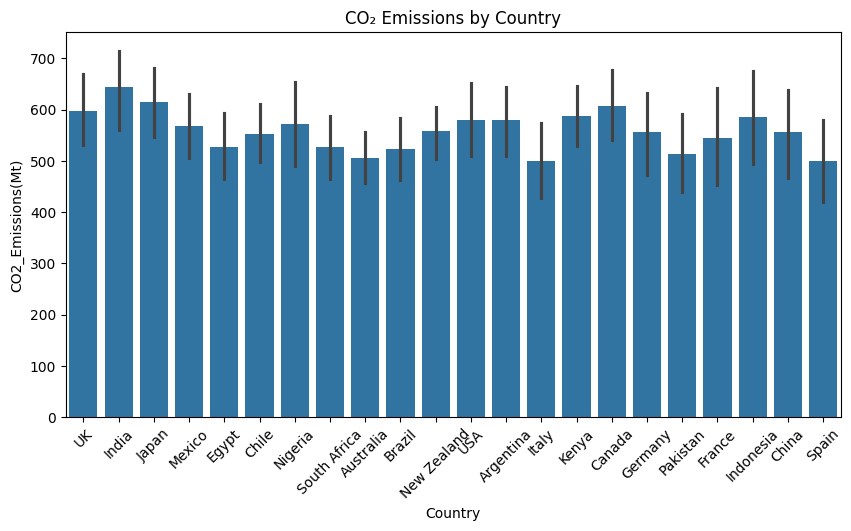

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Global_Climate_Change_Data_2020_2025.csv")

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Country', y='CO2_Emissions(Mt)')
plt.xticks(rotation=45)
plt.title("CO₂ Emissions by Country")
plt.show()


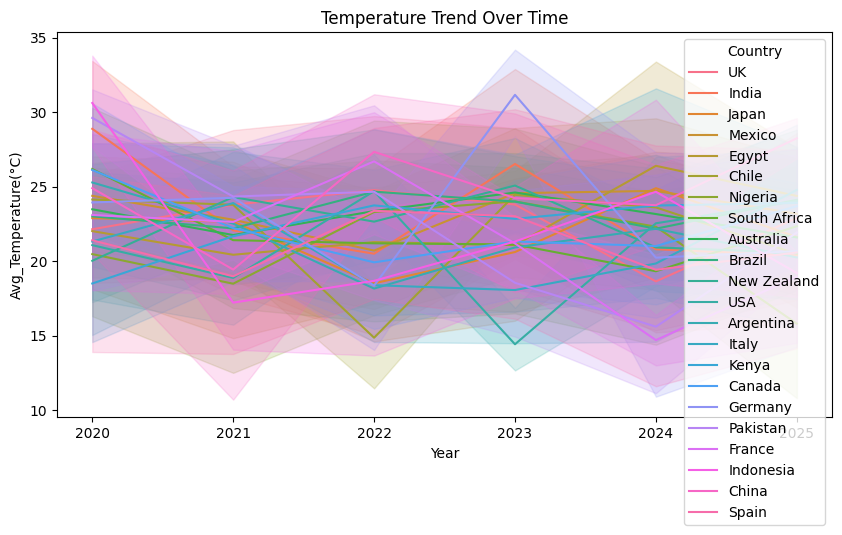

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Avg_Temperature(°C)', hue='Country')
plt.title("Temperature Trend Over Time")
plt.show()


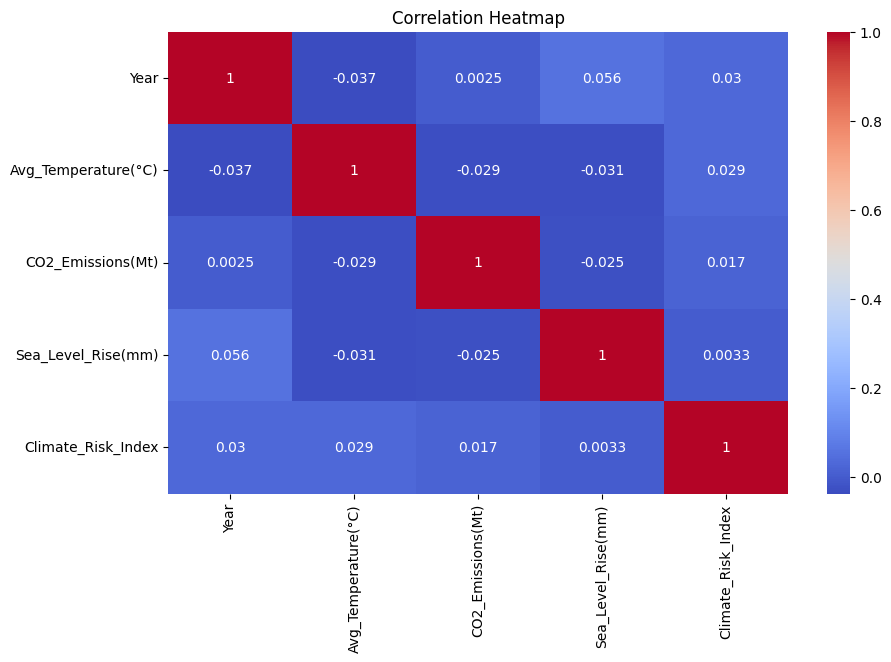

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


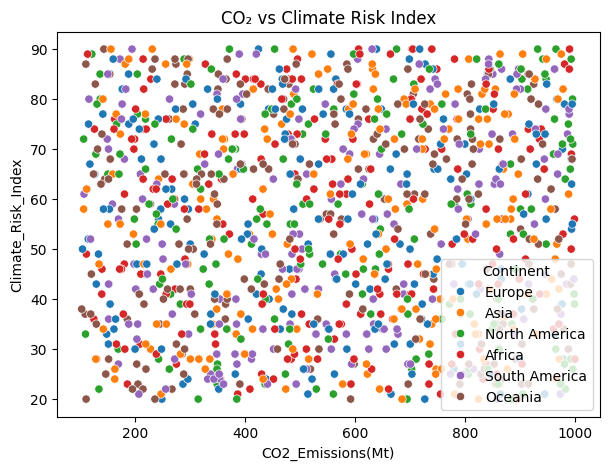

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='CO2_Emissions(Mt)', y='Climate_Risk_Index', hue='Continent')
plt.title("CO₂ vs Climate Risk Index")
plt.show()


In [16]:
y_pred = model.predict(X_test)
print(y_pred)


[58.23  59.835 54.025 57.18  60.06  49.365 63.66  70.8   59.41  61.705
 68.49  51.195 58.21  59.745 54.93  55.62  50.155 51.06  38.36  51.25
 52.185 52.89  57.21  50.345 59.605 58.525 50.65  57.135 48.93  53.205
 52.73  54.195 55.44  56.19  62.605 61.545 56.82  39.295 61.225 62.525
 60.2   45.225 44.505 49.7   57.615 56.415 50.275 45.91  69.035 53.325
 48.055 72.4   54.72  54.75  60.41  56.88  51.985 55.675 61.29  62.715
 54.865 56.38  58.93  62.425 59.075 58.73  51.33  50.835 51.84  69.515
 52.08  53.325 63.095 43.99  52.61  61.115 54.335 47.585 49.095 56.305
 61.21  55.985 48.715 41.415 54.965 42.51  59.53  58.53  48.9   58.395
 51.47  65.25  46.995 49.495 56.135 56.47  63.63  55.94  61.73  52.065
 53.78  66.415 51.89  61.195 50.14  58.63  53.15  62.76  63.84  53.575
 51.43  52.655 57.415 53.38  58.54  52.325 52.815 55.805 55.545 54.585
 55.65  48.985 50.135 56.27  63.005 52.03  52.26  56.215 59.495 55.625
 53.29  48.155 55.325 41.97  46.69  63.815 55.    55.83  55.425 54.645
 55.68 

In [17]:
new_data = [[2024, 2, 5, 28.4, 450.2, 3.1]]
# [Year, Continent, Country, Temp, CO2, SeaLevel]

prediction = model.predict(new_data)
print("Predicted Climate Risk Index:", prediction[0])


Predicted Climate Risk Index: 50.095


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [21]:
import pickle
import google.colab

Gobal_model= open('Gobal_model.pkl','wb')
pickle.dump(model,Gobal_model)

files.download('Gobal_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>